# Data Mining Project
## Exploratory Data Analysis (EDA) and Visualization of Flight Data 
### Marta Feital

## Data Wrangling

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
data = pd.read_csv('https://raw.githubusercontent.com/catamina07/datamining-group/64d5edb1e1a39716e570308abb8b803f43144806/data/DM_AIAI_FlightsDB.csv')
data.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [27]:
data.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000
mean,550037.873084,2020.000000,6.500000,3.908107,0.983944,7939.341419,793.777781,235.251678,2.324835
std,258935.180575,0.816497,3.452055,5.057889,2.003785,10260.421873,1025.918521,983.233374,9.725168
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2019.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2020.000000,6.500000,0.000000,0.000000,856.400000,85.275000,0.000000,0.000000
75%,772194.000000,2021.000000,9.250000,7.200000,0.900000,15338.175000,1533.712500,0.000000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


In [28]:
data.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

In [29]:
data = data.drop(columns=['YearMonthDate'])
data

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,2.0,2.0,9384.0,938.00,0.0,0.0
1,464105,2021,12,0.0,0.0,0.0,0.00,0.0,0.0
2,681785,2021,12,10.0,3.0,14745.0,1474.00,0.0,0.0
3,185013,2021,12,16.0,4.0,26311.0,2631.00,3213.0,32.0
4,216596,2021,12,9.0,0.0,19275.0,1927.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...
608431,999902,2019,12,7.2,0.0,30766.5,3076.65,0.0,0.0
608432,999911,2019,12,0.0,0.0,0.0,0.00,0.0,0.0
608433,999940,2019,12,14.4,0.9,18261.0,1826.10,0.0,0.0
608434,999982,2019,12,0.0,0.0,0.0,0.00,0.0,0.0


We dropped the column 'YearMonthDate' as it is not relevant for our analysis, because we already have the columns Year and Month and this one will always have the same values as those two, making it redundant.

In [30]:
data['NumFlights'].value_counts()

NumFlights
0.0     304524
9.0      20344
3.0      18228
11.0     15705
5.0      15084
7.0      14561
8.0      14357
6.0      13847
2.0      13641
10.0     13363
4.0      12821
1.0      12667
13.0     10782
12.0     10382
9.9       7537
14.0      7057
2.7       6910
6.3       6772
7.2       6720
5.4       6678
15.0      6582
8.1       6527
3.6       6519
4.5       6369
1.8       6314
0.9       5851
10.8      5392
11.7      5167
16.0      4354
17.0      3899
18.0      3507
13.5      3272
12.6      3249
14.4      2165
15.3      1817
19.0      1496
16.2      1364
20.0      1156
17.1       696
21.0       528
18.9       232
Name: count, dtype: int64

As it isn't possible to have the number of flights as a float, the python function int(), that transforms a number into an integer (rounding down), was applied to the column 'NumFlights', in order to have clean data that we can use to do Exploratory Data Analysis (EDA) and get some insights about the flight data.

In [31]:
data['NumFlights'] = [int(i) for i in data['NumFlights']]
data['NumFlights'].value_counts()

NumFlights
0     310375
9      27881
3      24747
5      21762
7      21281
8      20884
11     20872
6      20619
2      20551
4      19190
1      18981
10     18755
13     14054
12     13631
14      9222
15      8399
16      5718
17      4595
18      3739
19      1496
20      1156
21       528
Name: count, dtype: int64

In [32]:
data['NumFlightsWithCompanions'].value_counts()

NumFlightsWithCompanions
0.0     448398
2.0      19272
3.0      19015
1.0      17905
4.0      13665
5.0      13424
6.0       9911
1.8       8636
2.7       8509
0.9       8368
3.6       7138
7.0       7089
4.5       5938
5.4       5204
8.0       3965
6.3       3508
9.0       3443
7.2       1940
8.1       1356
10.0      1071
11.0       476
9.9        205
Name: count, dtype: int64

In [33]:
data['NumFlightsWithCompanions'] = [int(i) for i in data['NumFlightsWithCompanions']]
data['NumFlightsWithCompanions'].value_counts()

NumFlightsWithCompanions
0     456766
2      27781
1      26541
3      26153
4      19603
5      18628
6      13419
7       9029
8       5321
9       3648
10      1071
11       476
Name: count, dtype: int64

The same was done to the column 'NumFlightsWithCompanions', as it is also not possible to have, for example, half a flight with companions.

In [34]:
data.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000,608436.000000
mean,550037.873084,2020.000000,6.500000,3.827226,0.932188,7939.341419,793.777781,235.251678,2.324835
std,258935.180575,0.816497,3.452055,5.017513,1.965252,10260.421873,1025.918521,983.233374,9.725168
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326961.000000,2019.000000,3.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550834.000000,2020.000000,6.500000,0.000000,0.000000,856.400000,85.275000,0.000000,0.000000
75%,772194.000000,2021.000000,9.250000,7.000000,0.000000,15338.175000,1533.712500,0.000000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


In [35]:
data['Loyalty#'].nunique()

16737

In [43]:
points = data.groupby('Loyalty#', as_index=False).sum(numeric_only=True)[['PointsAccumulated', 'PointsRedeemed']]
print(points)
filter_points = (points['PointsRedeemed'] <= points['PointsAccumulated'])
filter_points.value_counts()

       PointsAccumulated  PointsRedeemed
0               53014.30         20562.8
1               33903.96         18760.6
2               43192.58          4896.0
3               36453.77         12908.6
4               42953.25         10891.4
...                  ...             ...
16732           61006.55         10501.8
16733               0.00             0.0
16734           23855.59          5620.0
16735            5264.00             0.0
16736           34506.96         18049.4

[16737 rows x 2 columns]


True     16279
False      458
Name: count, dtype: int64

In [44]:
points[(points['PointsRedeemed']>points['PointsAccumulated'])]

,PointsAccumulated,PointsRedeemed
81,5457.00,9014.0
120,12108.00,12947.0
170,8036.99,10549.9
174,21905.53,25591.1
299,6771.00,6798.0
...,...,...
16539,7535.00,8061.0
16551,7431.00,10999.0
16590,4660.00,8599.0
16615,26002.52,28849.5


To understand if the points system had quality data, we grouped the flight data by loyalty number, and summed the points accumulated and redeemed. After that, we observed that there were some customers that redeemed more points than they had accumulated, which doesn't seem to make sense. This happened for 458 customers out of 16737, which is around 2.7% of the total customers.
To resolve this issue we decided to understand better the root of the problem before doing some assumptions.

In [45]:
#data = data.drop(columns=['DollarCostPointsRedeemed', 'DistanceKM'])
#data

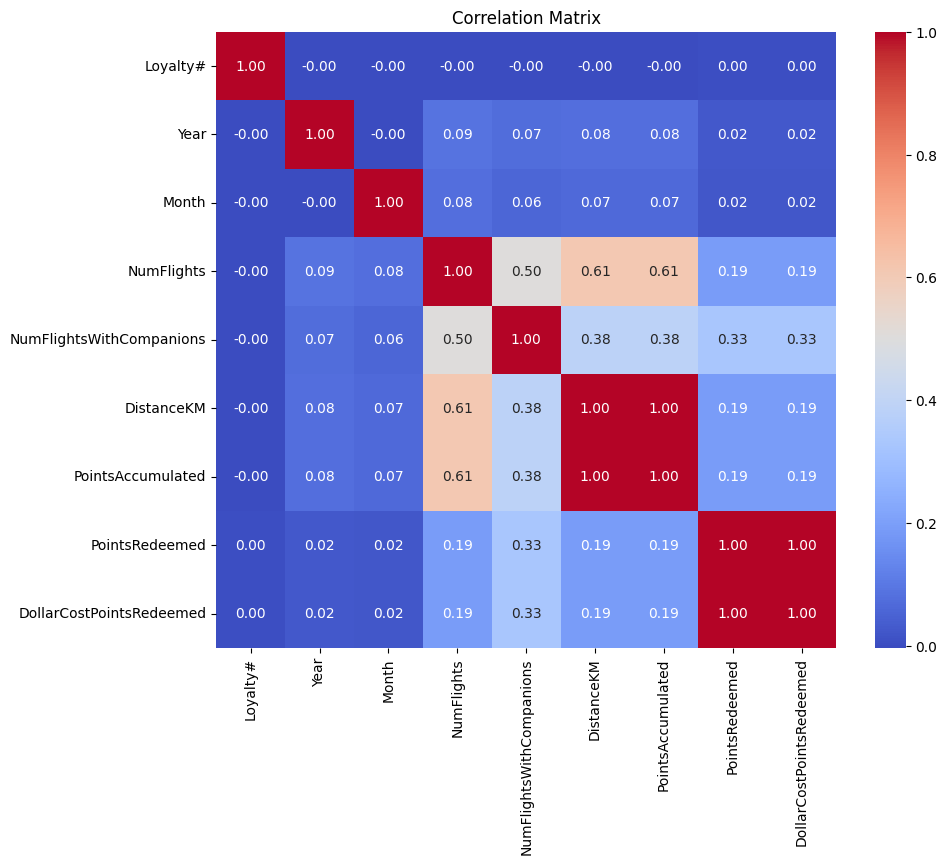

In [46]:
correlation_matrix = data.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

The variables in this dataset are not highly correlated, as we can see in the correlation matrix above. The highest correlation is between 'NumFlights' and 'Points Accumulated', which makes sense, as the more flights a customer takes, the more points they collect. Additionally, customers who take more flights with companions tend to redeem more points as well.

# Relation Between Number of Flights and Number of Flights with Companions

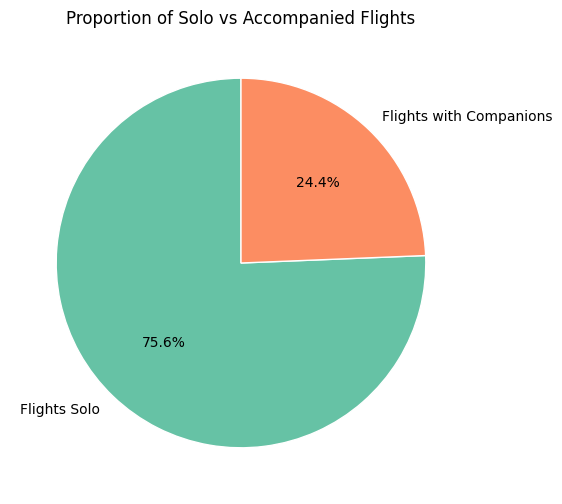

In [47]:
data['NumSoloFlights'] = data['NumFlights'] - data['NumFlightsWithCompanions']
flights_with_companions = data['NumFlightsWithCompanions'].sum()
flights_solo = data['NumSoloFlights'].sum()

# Data
values = [flights_solo, flights_with_companions]
labels = ['Flights Solo', 'Flights with Companions']
colors = ['#66c2a5', '#fc8d62']  # optional colors

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of Solo vs Accompanied Flights')
plt.show()


As we can see in the pie chart above, the majority of the flights were taken alone, representing 75.6% of them, while only 24.4% of the flights were taken with companions.

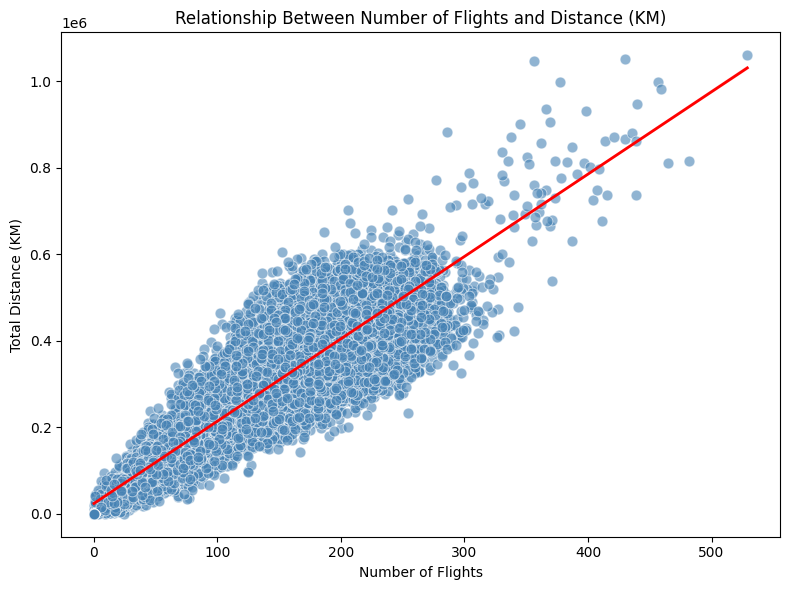

In [50]:
plot_data = data.groupby('Loyalty#', as_index=False).sum(numeric_only=True)

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=plot_data,
    x='NumFlights',
    y='DistanceKM',
    alpha=0.6,           # transparency for overlapping points
    s=60,                # point size
    color='steelblue'    # or use a colormap via hue
)

# Add a regression (trend) line
sns.regplot(
    data=plot_data,
    x='NumFlights',
    y='DistanceKM',
    scatter=False,        # hide duplicate points
    color='red',          # line color
    line_kws={'linewidth':2}
)

plt.title('Relationship Between Number of Flights and Distance (KM)')
plt.xlabel('Number of Flights')
plt.ylabel('Total Distance (KM)')
plt.tight_layout()
plt.show()



As we can see in the scatter plot above there is a positive and linear correlation between the number of flights and the number of flights with companions. This means that as the number of flights increases, the number of flights with companions also tends to increase. However, the relationship is not very strong, as there are many points scattered around the trend line.
We can also observe the costumers that fly more also tend to fly bigger distances.

<Axes: xlabel='PointsAccumulated', ylabel='PointsRedeemed'>

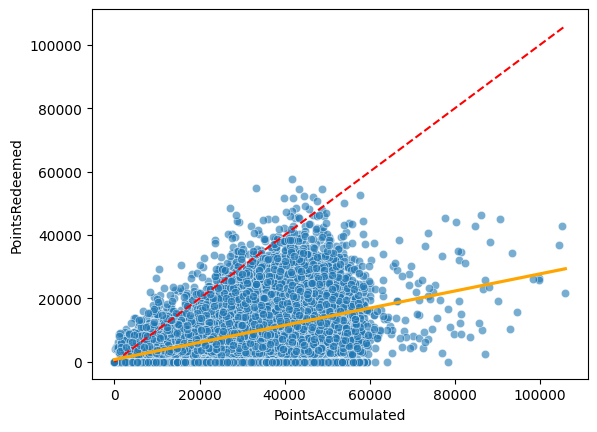

In [58]:
data_plot = data.groupby('Loyalty#', as_index=False).sum(numeric_only=True)

max_val = max(data_plot['PointsAccumulated'].max(), data_plot['PointsRedeemed'].max())

sns.scatterplot(data=data_plot, x='PointsAccumulated', y='PointsRedeemed', alpha=0.6)
plt.plot([0, max_val], [0, max_val], 'r--', label='y = x')
sns.regplot(data=data_plot, x='PointsAccumulated', y='PointsRedeemed', scatter=False, color='orange')


The customers above the x=y line are the ones that redeemed more points than they accumulated. We can look at them as potential outliers, those are the 458 customers we mentioned before. Maybe with the data in the customers dataset we can understand better why this happened.

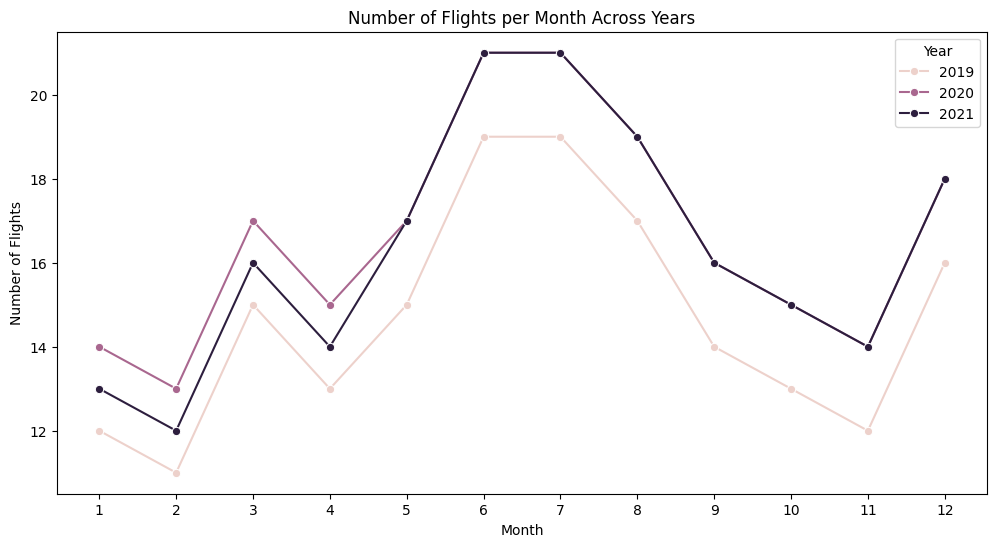

In [62]:
monthly_data = data.groupby(['Year', 'Month'], as_index=False)['NumFlights'].nunique()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_data, x='Month', y='NumFlights', hue='Year', marker='o')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month Across Years')
plt.show()


The months with the highest number of flights are June and July, as it was expected since those are summer months in Canada, where people tend to travel more, since they also coincide with school vacations. The month with the lowest number of flights is February, which is also expected since it is a winter month and there are no holidays, so people tend to travel less during this time of the year.


Strangely the year with the highest number of flights is 2020, which is unexpected since it was the year of quarantines and travel restrictions due to the pandemic of COVID-19. However, it is possible that the data includes flights that were cancelled, and that people who weren't able to take the flights booked before the restrictions are included in the numbers, which could explain the higher number of flights in 2020 compared to other years.

# FLIGHTS EDA

## Metadata
- *id* - The unique identifier of the customer
- *Loyalty#* - Unique customer identifier linking to CustomerDB
- *Year* - Year of flight activity record
- *Month* -	Month of flight activity record (1-12)
- *YearMonthDate* -	First day of the month for the activity period
- *NumFlights* -	Total number of flights taken by customer in the month
- *NumFlightsWithCompanions* -	Number of flights where customer traveled with companions
- *DistanceKM* -	Total distance traveled in kilometers for the month
- *PointsAccumulated* -	Loyalty points earned by customer during the month
- *PointsRedeemed* -	Loyalty points spent/redeemed by customer during the month
- *DollarCostPointsRedeemed* -	Dollar value of points redeemed during the month

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
flights = pd.read_csv('https://raw.githubusercontent.com/catamina07/datamining-group/64d5edb1e1a39716e570308abb8b803f43144806/data/DM_AIAI_FlightsDB.csv')
flights.head()

,Loyalty#,Year,Month,YearMonthDate,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
0,413052,2021,12,12/1/2021,2.0,2.0,9384.0,938.0,0.0,0.0
1,464105,2021,12,12/1/2021,0.0,0.0,0.0,0.0,0.0,0.0
2,681785,2021,12,12/1/2021,10.0,3.0,14745.0,1474.0,0.0,0.0
3,185013,2021,12,12/1/2021,16.0,4.0,26311.0,2631.0,3213.0,32.0
4,216596,2021,12,12/1/2021,9.0,0.0,19275.0,1927.0,0.0,0.0


In [42]:
flights.columns

Index(['Loyalty#', 'Year', 'Month', 'YearMonthDate', 'NumFlights',
       'NumFlightsWithCompanions', 'DistanceKM', 'PointsAccumulated',
       'PointsRedeemed', 'DollarCostPointsRedeemed'],
      dtype='object')

In [43]:
flights.replace("", np.nan, inplace=True)
flights.isna().sum()

Loyalty#                    0
Year                        0
Month                       0
YearMonthDate               0
NumFlights                  0
NumFlightsWithCompanions    0
DistanceKM                  0
PointsAccumulated           0
PointsRedeemed              0
DollarCostPointsRedeemed    0
dtype: int64

In [44]:
flights.duplicated().sum()

2903

In [45]:
flights.duplicated(subset=['Loyalty#', 'Year', 'Month', 'NumFlights', 'NumFlightsWithCompanions', 'PointsAccumulated', 'PointsRedeemed', 'DollarCostPointsRedeemed', 'DistanceKM'])

0         False
1         False
2         False
3         False
4         False
          ...  
608431    False
608432    False
608433    False
608434    False
608435    False
Length: 608436, dtype: bool

In [46]:
flights = flights.drop_duplicates()

In [47]:
flights.duplicated().sum()

0

In [48]:
flights.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed,DollarCostPointsRedeemed
count,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000
mean,549849.322158,2020.000467,6.501362,3.926843,0.988662,7977.403603,797.583250,236.379504,2.335981
std,258966.799122,0.816593,3.451962,5.062737,2.007421,10270.215544,1026.897996,985.452175,9.747117
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326603.000000,2019.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550575.000000,2020.000000,7.000000,0.900000,0.000000,993.600000,99.000000,0.000000,0.000000
75%,772152.000000,2021.000000,10.000000,7.200000,1.000000,15408.900000,1540.710000,0.000000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000,74.000000


In [49]:
flights['Loyalty#'].nunique()

16737

Small analysis of the descriptive statistics:
- *Loyalty#* - No statistics analysis important cause its just a unique identifier of the customer.
- *Year* - the data that we have is between 2019 and 2021 (3 years of data, pandemic years (maybe it will be interesting)). Flights divided equally (mean and median being the same we can assume that every year as same amount of data).
- *Month* - the data is uniform since the mean and the median is almost equal, no interesting analysis about this.
- *NumFlights* - median = 0.9 -> most of the costumers don't fly once a month but the 3quartile  being 7.2 flights means that there is some loyal costumers flying more then once a month. It shows a really accentuated right asymmetry.
- *NumFlightsWithCompanions* - most of the costumers don't flight with companions, the 3quartile shows it being still 1.
- *DistanceKM* - 50% of the costumers don't flights that often, since median is only 993.6. On other side, the mean being 7977.40 shows that there is still some costumers flying often, in basic terms the data is divided by most of the costumers flying small durations and the costumers that fly more often.
- *PointsAccumulated* - most of the costumers don't accumulated points, once again the median is really low 99.0 but we have some loyal costumers since the 3percentile is $\approx$ 1533. That explains the high mean of $\approx$ 1026.89.
- *PointsRedeemed* and *DollarCostPointsRedeemed* - the costumers only redeemed high quantities of points (interesting to analyze in the future). There is a huge right asymmetry.

In [50]:
flights.dtypes

Loyalty#                      int64
Year                          int64
Month                         int64
YearMonthDate                object
NumFlights                  float64
NumFlightsWithCompanions    float64
DistanceKM                  float64
PointsAccumulated           float64
PointsRedeemed              float64
DollarCostPointsRedeemed    float64
dtype: object

In [51]:
flights = flights.drop(columns=['YearMonthDate', 'DollarCostPointsRedeemed'])
flights

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
0,413052,2021,12,2.0,2.0,9384.0,938.00,0.0
1,464105,2021,12,0.0,0.0,0.0,0.00,0.0
2,681785,2021,12,10.0,3.0,14745.0,1474.00,0.0
3,185013,2021,12,16.0,4.0,26311.0,2631.00,3213.0
4,216596,2021,12,9.0,0.0,19275.0,1927.00,0.0
...,...,...,...,...,...,...,...,...
608431,999902,2019,12,7.2,0.0,30766.5,3076.65,0.0
608432,999911,2019,12,0.0,0.0,0.0,0.00,0.0
608433,999940,2019,12,14.4,0.9,18261.0,1826.10,0.0
608434,999982,2019,12,0.0,0.0,0.0,0.00,0.0


We dropped the column 'YearMonthDate' as it is not relevant for our analysis, because we already have the columns Year and Month and this one will always have the same values as those two, making it redundant.

In [52]:
flights['NumFlights'].value_counts()

NumFlights
0.0     301621
9.0      20344
3.0      18228
11.0     15705
5.0      15084
7.0      14561
8.0      14357
6.0      13847
2.0      13641
10.0     13363
4.0      12821
1.0      12667
13.0     10782
12.0     10382
9.9       7537
14.0      7057
2.7       6910
6.3       6772
7.2       6720
5.4       6678
15.0      6582
8.1       6527
3.6       6519
4.5       6369
1.8       6314
0.9       5851
10.8      5392
11.7      5167
16.0      4354
17.0      3899
18.0      3507
13.5      3272
12.6      3249
14.4      2165
15.3      1817
19.0      1496
16.2      1364
20.0      1156
17.1       696
21.0       528
18.9       232
Name: count, dtype: int64

As it isn't possible to have the number of flights as a float, the python function int(), that transforms a number into an integer (rounding down), was applied to the column 'NumFlights', in order to have clean data that we can use to do Exploratory Data Analysis (EDA) and get some insights about the flight data.

In [53]:
flights['NumFlights'] = [int(i) for i in flights['NumFlights']]
flights['NumFlights'].value_counts()

NumFlights
0     307472
9      27881
3      24747
5      21762
7      21281
8      20884
11     20872
6      20619
2      20551
4      19190
1      18981
10     18755
13     14054
12     13631
14      9222
15      8399
16      5718
17      4595
18      3739
19      1496
20      1156
21       528
Name: count, dtype: int64

In [54]:
flights['NumFlightsWithCompanions'].value_counts()

NumFlightsWithCompanions
0.0     445495
2.0      19272
3.0      19015
1.0      17905
4.0      13665
5.0      13424
6.0       9911
1.8       8636
2.7       8509
0.9       8368
3.6       7138
7.0       7089
4.5       5938
5.4       5204
8.0       3965
6.3       3508
9.0       3443
7.2       1940
8.1       1356
10.0      1071
11.0       476
9.9        205
Name: count, dtype: int64

In [55]:
flights['NumFlightsWithCompanions'] = [int(i) for i in flights['NumFlightsWithCompanions']]
flights['NumFlightsWithCompanions'].value_counts()

NumFlightsWithCompanions
0     453863
2      27781
1      26541
3      26153
4      19603
5      18628
6      13419
7       9029
8       5321
9       3648
10      1071
11       476
Name: count, dtype: int64

The same was done to the column 'NumFlightsWithCompanions', as it is also not possible to have, for example, half a flight with companions.

In [56]:
flights.describe()

,Loyalty#,Year,Month,NumFlights,NumFlightsWithCompanions,DistanceKM,PointsAccumulated,PointsRedeemed
count,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000,605533.000000
mean,549849.322158,2020.000467,6.501362,3.845574,0.936657,7977.403603,797.583250,236.379504
std,258966.799122,0.816593,3.451962,5.022507,1.968895,10270.215544,1026.897996,985.452175
min,100018.000000,2019.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,326603.000000,2019.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,550575.000000,2020.000000,7.000000,0.000000,0.000000,993.600000,99.000000,0.000000
75%,772152.000000,2021.000000,10.000000,7.000000,1.000000,15408.900000,1540.710000,0.000000
max,999986.000000,2021.000000,12.000000,21.000000,11.000000,42040.000000,4204.000000,7496.000000


In [57]:
flights['Loyalty#'].nunique()

16737

In [58]:
points = flights.groupby('Loyalty#', as_index=False).sum(numeric_only=True)[['PointsAccumulated', 'PointsRedeemed']]
print(points)
filter_points = (points['PointsRedeemed'] <= points['PointsAccumulated'])
filter_points.value_counts()

       PointsAccumulated  PointsRedeemed
0               53014.30         20562.8
1               33903.96         18760.6
2               43192.58          4896.0
3               36453.77         12908.6
4               42953.25         10891.4
...                  ...             ...
16732           61006.55         10501.8
16733               0.00             0.0
16734           23855.59          5620.0
16735            5264.00             0.0
16736           34506.96         18049.4

[16737 rows x 2 columns]


True     16279
False      458
Name: count, dtype: int64

In [59]:
points[(points['PointsRedeemed']>points['PointsAccumulated'])]

,PointsAccumulated,PointsRedeemed
81,5457.00,9014.0
120,12108.00,12947.0
170,8036.99,10549.9
174,21905.53,25591.1
299,6771.00,6798.0
...,...,...
16539,7535.00,8061.0
16551,7431.00,10999.0
16590,4660.00,8599.0
16615,26002.52,28849.5


To understand if the points system had quality data, we grouped the flight data by loyalty number, and summed the points accumulated and redeemed. After that, we observed that there were some customers that redeemed more points than they had accumulated, which doesn't seem to make sense. This happened for 458 customers out of 16737, which is around 2.7% of the total customers.
To resolve this issue we decided to understand better the root of the problem before doing some assumptions.

In [60]:
flights.loc[flights['NumFlights']==0].shape

(307472, 8)

In [61]:
flights.shape

(605533, 8)

In [62]:
605533-301621

303912

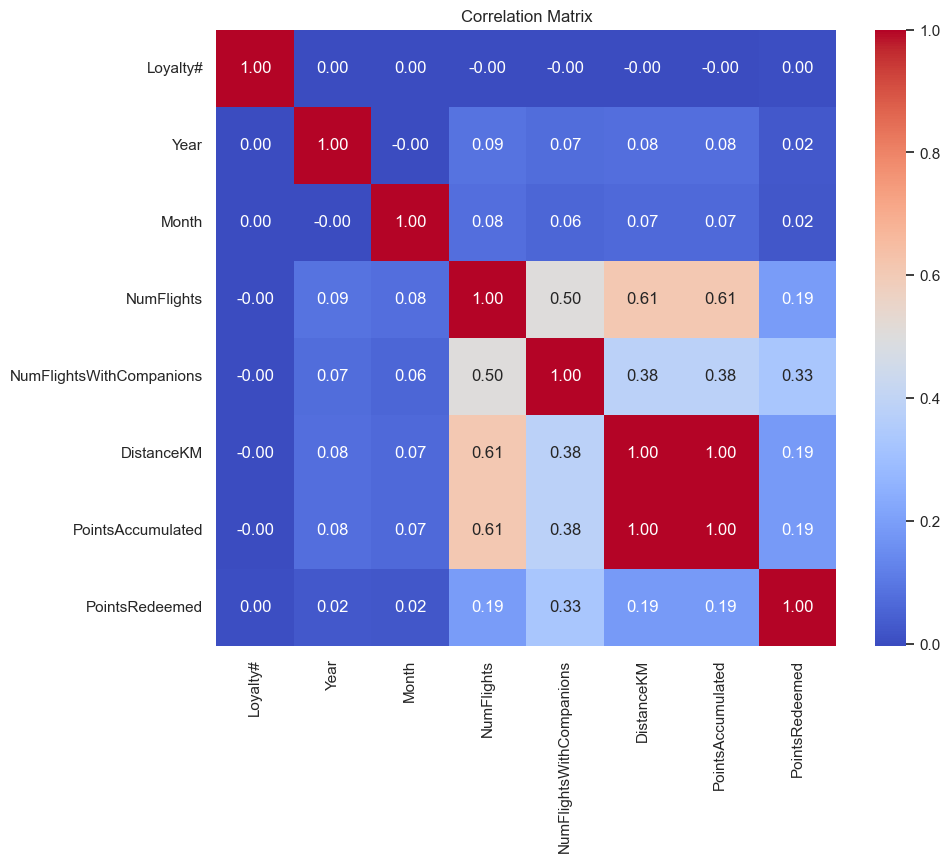

In [63]:
correlation_matrix = flights.corr(numeric_only=True)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Análise

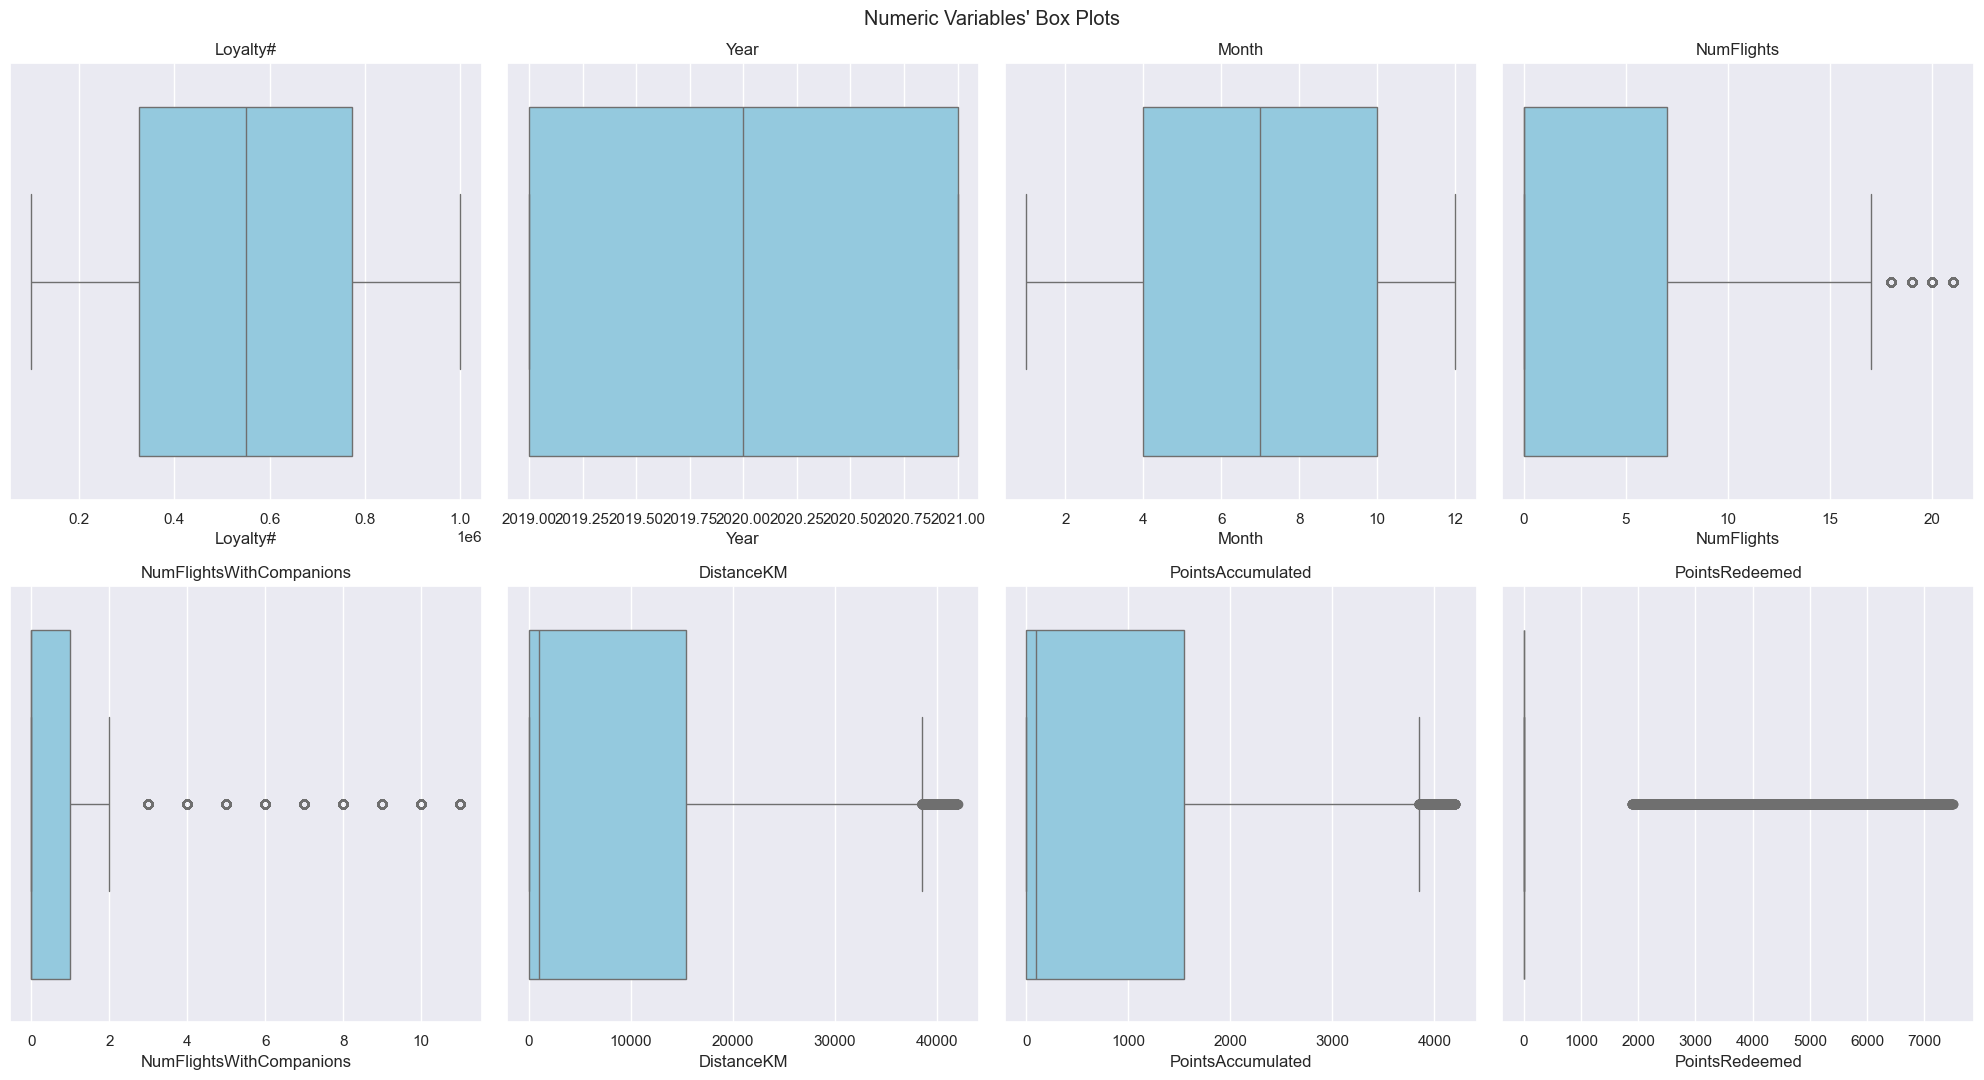

In [ ]:
from math import ceil
import os
# Plot ALL Numeric Variables' Histograms in one figure

sns.set() ## Reset to darkgrid

## What do these do?
sp_rows = 2
num_features = flights.select_dtypes(include='number').columns
sp_cols = ceil(len(num_features) / sp_rows)


# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11),
                         tight_layout=True
                        )

# Plot data
# Iterate across axes objects and associate each histogram (hint: use the ax.hist() instead of plt.hist()):
for ax, feat in zip(axes.flatten(), num_features):
    sns.boxplot(x=flights[feat], ax=ax, color='skyblue')
    ax.set_title(feat)

    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Box Plots"

plt.suptitle(title)

plt.show()

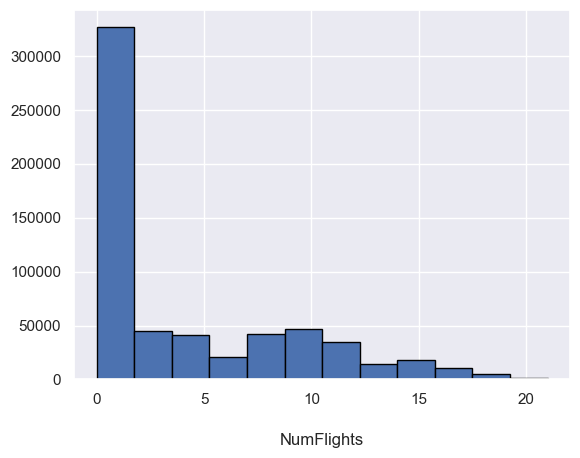

In [65]:
plt.hist(flights['NumFlights'], bins=12, edgecolor='black')
plt.title('NumFlights', y=-0.2)
plt.show()

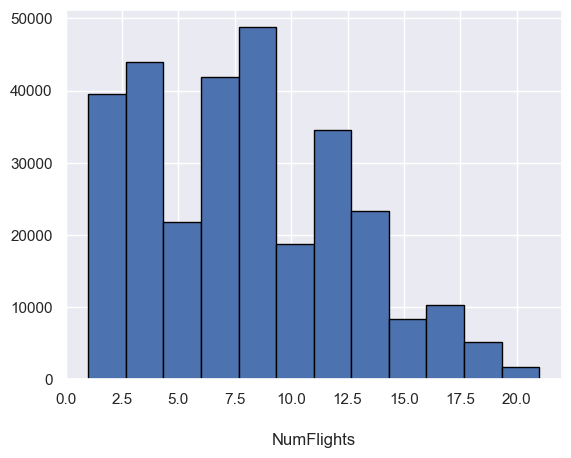

In [66]:
plt.hist(flights[flights['NumFlights']>0]['NumFlights'], bins=12, edgecolor='black')
plt.title('NumFlights', y=-0.2)
plt.show()

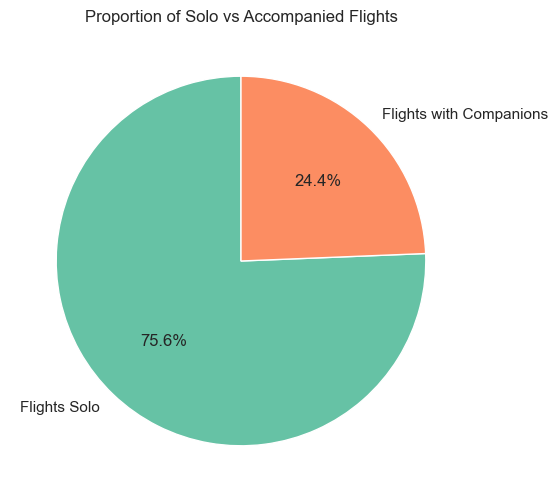

In [67]:
# Relation Between Number of Flights and Number of Flights with Companions
flights['NumSoloFlights'] = flights['NumFlights'] - flights['NumFlightsWithCompanions']
flights_with_companions = flights['NumFlightsWithCompanions'].sum()
flights_solo = flights['NumSoloFlights'].sum()

# Data
values = [flights_solo, flights_with_companions]
labels = ['Flights Solo', 'Flights with Companions']
colors = ['#66c2a5', '#fc8d62']  # optional colors

# Plot
plt.figure(figsize=(6,6))
plt.pie(
    values,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops={'edgecolor': 'white'}
)
plt.title('Proportion of Solo vs Accompanied Flights')
plt.show()


As we can see in the pie chart above, the majority of the flights were taken alone, representing 75.6% of them, while only 24.4% of the flights were taken with companions.

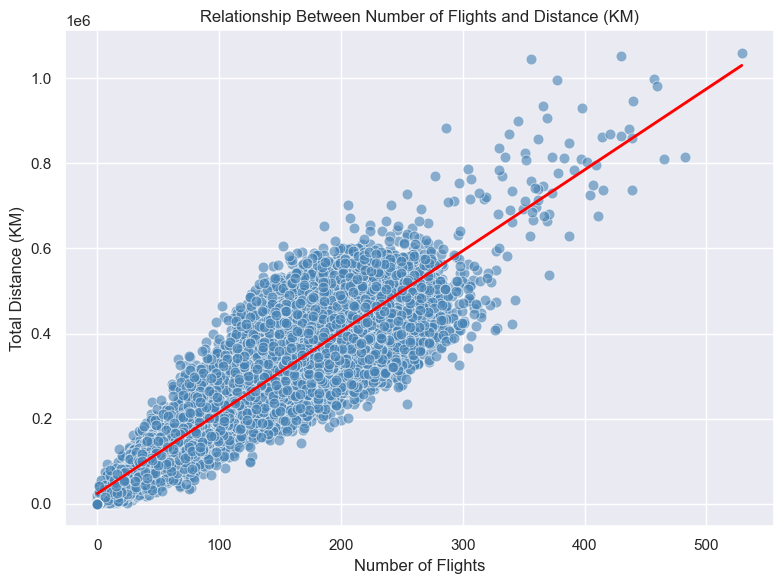

In [68]:
plot_data = flights.groupby('Loyalty#', as_index=False).sum(numeric_only=True)

plt.figure(figsize=(8,6))

sns.scatterplot(
    data=plot_data,
    x='NumFlights',
    y='DistanceKM',
    alpha=0.6,           # transparency for overlapping points
    s=60,                # point size
    color='steelblue'    # or use a colormap via hue
)

# Add a regression (trend) line
sns.regplot(
    data=plot_data,
    x='NumFlights',
    y='DistanceKM',
    scatter=False,        # hide duplicate points
    color='red',          # line color
    line_kws={'linewidth':2}
)

plt.title('Relationship Between Number of Flights and Distance (KM)')
plt.xlabel('Number of Flights')
plt.ylabel('Total Distance (KM)')
plt.tight_layout()
plt.show()



As we can see in the scatter plot above there is a positive and linear correlation between the number of flights and the number of flights with companions. This means that as the number of flights increases, the number of flights with companions also tends to increase. However, the relationship is not very strong, as there are many points scattered around the trend line.
We can also observe the costumers that fly more also tend to fly bigger distances.

<Axes: xlabel='PointsAccumulated', ylabel='PointsRedeemed'>

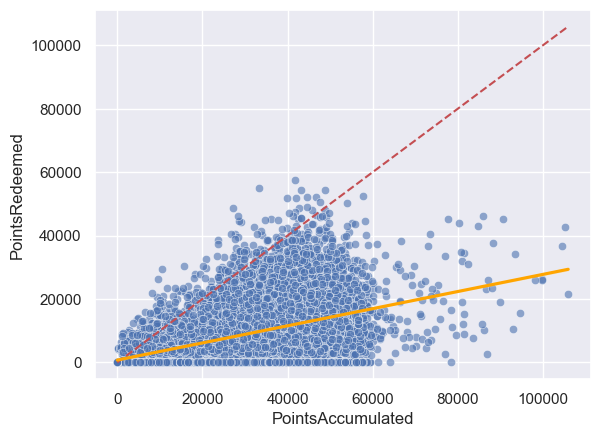

In [69]:
data_plot = flights.groupby('Loyalty#', as_index=False).sum(numeric_only=True)

max_val = max(data_plot['PointsAccumulated'].max(), data_plot['PointsRedeemed'].max())

sns.scatterplot(data=data_plot, x='PointsAccumulated', y='PointsRedeemed', alpha=0.6)
plt.plot([0, max_val], [0, max_val], 'r--', label='y = x')
sns.regplot(data=data_plot, x='PointsAccumulated', y='PointsRedeemed', scatter=False, color='orange')


The customers above the x=y line are the ones that redeemed more points than they accumulated. We can look at them as potential outliers, those are the 458 customers we mentioned before. Maybe with the data in the customers dataset we can understand better why this happened.

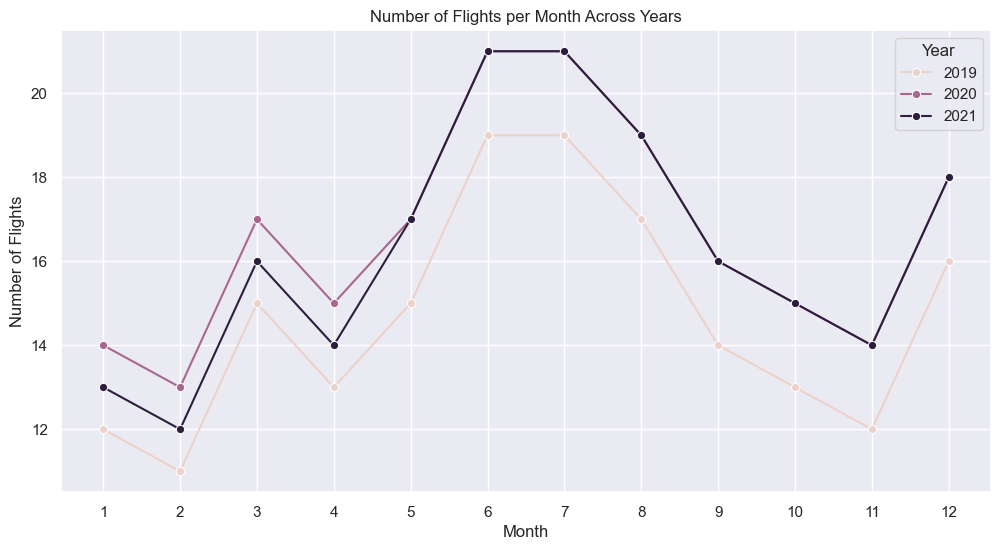

In [70]:
monthly_data = flights.groupby(['Year', 'Month'], as_index=False)['NumFlights'].nunique()

plt.figure(figsize=(12,6))
sns.lineplot(data=monthly_data, x='Month', y='NumFlights', hue='Year', marker='o')
plt.xticks(range(1,13))
plt.xlabel('Month')
plt.ylabel('Number of Flights')
plt.title('Number of Flights per Month Across Years')
plt.show()


The months with the highest number of flights are June and July, as it was expected since those are summer months in Canada, where people tend to travel more, since they also coincide with school vacations. The month with the lowest number of flights is February, which is also expected since it is a winter month and there are no holidays, so people tend to travel less during this time of the year.


Strangely the year with the highest number of flights is 2020, which is unexpected since it was the year of quarantines and travel restrictions due to the pandemic of COVID-19. However, it is possible that the data includes flights that were cancelled, and that people who weren't able to take the flights booked before the restrictions are included in the numbers, which could explain the higher number of flights in 2020 compared to other years.